In [1]:
# ✅ Imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# ✅ Load dataset
categories = ['rec.sport.baseball', 'sci.space', 'comp.graphics', 'talk.politics.mideast']

newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

print("Total documents:", len(newsgroups.data))
print("Target names:", newsgroups.target_names)
print("Example document:\n", newsgroups.data[0][:500])  # preview


Total documents: 3894
Target names: ['comp.graphics', 'rec.sport.baseball', 'sci.space', 'talk.politics.mideast']
Example document:
 
What is the copyright status of this data?  Are there restrictions regarding the
uses they can be put to?

Kaveh




In [3]:
# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# ✅ Pipeline: TF-IDF + Naive Bayes
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)


In [4]:
# ✅ Evaluation
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=categories))


Accuracy: 0.9137577002053389

Classification Report:
                        precision    recall  f1-score   support

   rec.sport.baseball       0.95      0.89      0.92       270
            sci.space       0.85      0.96      0.90       232
        comp.graphics       0.93      0.87      0.89       231
talk.politics.mideast       0.93      0.95      0.94       241

             accuracy                           0.91       974
            macro avg       0.91      0.91      0.91       974
         weighted avg       0.92      0.91      0.91       974



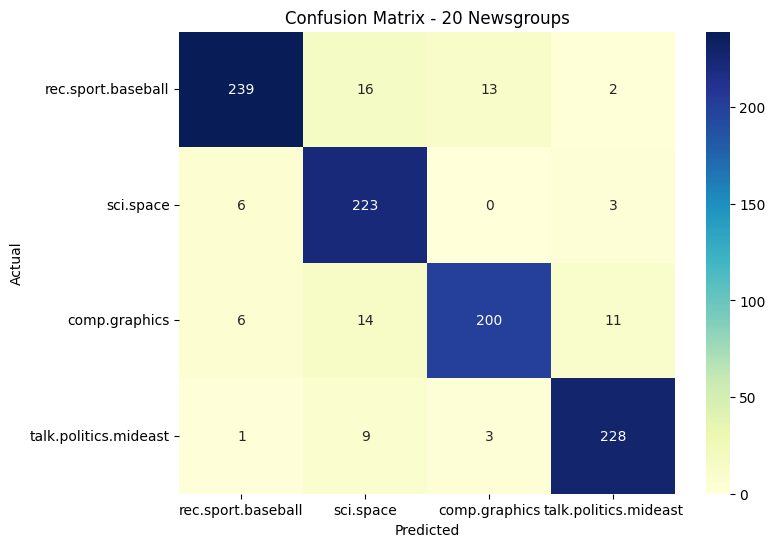

In [5]:
# ✅ Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories, cmap='YlGnBu')
plt.title("Confusion Matrix - 20 Newsgroups")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
